<h1>Calculate <i>&#8508-value</i> using Monthe-Carlo method</h1>
<hr>
We have to calculate <BIG>&#8508</BIG>. So we have a square with lenght of side <i>2</i>. In this square cirle was inscribed, so the radius of it equel to <i>1</i>
<CENTER>
<img src="monte-carlo.jpg" width="250" height="275">
</CENTER>
As we know area of square and cirle can be calculated like:
<CENTER>
    <math>
	    S<sub>circle</sub> = &#8508 r<sup>2</sup>
        <br>
        S<sub>square</sub> = a<sup>2</sup>, <i>where the 'a' is a lenght of side</i>
    </math>
</CENTER>

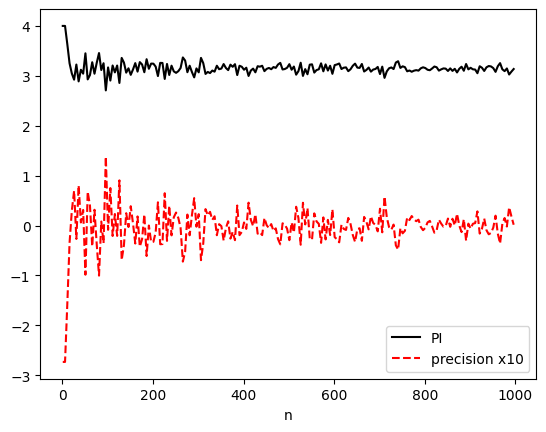

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def calc(n):
    dots = np.random.uniform(-1, 1, size=(n,2))
    x = np.sum((dots[:,0]**2+dots[:,1]**2)<1)
    Pi = 4*x/n
    precision = 1 - Pi/math.pi
    return Pi, precision

n = np.arange(1, 1000, 5)
v_calc = np.vectorize(calc)
Pi, precision = v_calc(n)
plt.plot(n, Pi, color='black', label='PI')
plt.plot(n, precision*10, color='red', linestyle='--', label='precision x10')
plt.xlabel('n')
plt.legend(loc="lower right")
plt.show()

<h1>Find unknown veriables <b>a, b</b>, using the dialog of two scientists</h1>
<hr>
1 < a,b < 100

a*b = sub

a+b = sum

<i><b>pr. Prod</b>: I don't know this numebers</i>

In [2]:
subs = []
for k in range(2, 99*99 + 1):
    num = 0
    for i in range(2, 100):
        for j in range(2, 100):
            if i*j == k: num+=1
    if num > 2: subs.append(k)
print(subs)
#subs is the list of substracts that can be true

[12, 16, 18, 20, 24, 28, 30, 32, 36, 40, 42, 44, 45, 48, 50, 52, 54, 56, 60, 63, 64, 66, 68, 70, 72, 75, 76, 78, 80, 81, 84, 88, 90, 92, 96, 98, 99, 100, 102, 104, 105, 108, 110, 112, 114, 116, 117, 120, 124, 126, 128, 130, 132, 135, 136, 138, 140, 144, 147, 148, 150, 152, 153, 154, 156, 160, 162, 164, 165, 168, 170, 171, 172, 174, 175, 176, 180, 182, 184, 186, 188, 189, 190, 192, 195, 196, 198, 200, 204, 207, 208, 210, 216, 220, 222, 224, 225, 228, 230, 231, 232, 234, 238, 240, 243, 245, 246, 248, 250, 252, 255, 256, 258, 260, 261, 264, 266, 270, 272, 273, 275, 276, 279, 280, 282, 285, 286, 288, 290, 294, 296, 297, 300, 304, 306, 308, 310, 312, 315, 320, 322, 324, 325, 328, 330, 336, 340, 342, 344, 345, 348, 350, 351, 352, 357, 360, 364, 368, 370, 372, 374, 375, 376, 378, 380, 384, 385, 390, 392, 396, 399, 400, 405, 406, 408, 410, 414, 416, 418, 420, 425, 429, 430, 432, 434, 435, 440, 441, 442, 444, 448, 450, 455, 456, 459, 460, 462, 464, 465, 468, 470, 475, 476, 480, 483, 484, 486, 4

<i><b>pr. Sum</b>: I knew that</i>


In [3]:
sums = range(4, 199)
#from of pr. Sub, pr.Sum gets the knowledge about subs-list

If we imagine that 'a' and 'b' create a rectangle, then sub is its <b>area</b> and sum is its <b>half-perimetr</b>. So we can say that theese values have the next relaytions    (Heron's formula):
<br>
$$Sub = \sqrt{(Sum-a)^2(Sum+b)^2}$$
Lets call <i> the product</i> as <b>S</b> and <i>the sum</i> as <b>p</b>. In this case our formula will take a look like this:
<br>
$$ S = \sqrt{(p-a)^2(p+b)^2} $$
<br>
Let`s see what <b>S</b> can exist if we know the <b>p</b>:<br>
<br>p = [[a<sub>1</sub> + b<sub>1</sub>, S<sub>1</sub>], [a<sub>2</sub> + b<sub>2</sub>, S<sub>2</sub>]....[a<sub>n</sub> + b<sub>n</sub>, S<sub>n</sub>]]<br>
4 = [[2+2, 4]]<br>
5 = [[3+2, 6]]<br>
6 = [[3+3, 9], [4+2, 8]]<br>
7 = [[4+3, 12], [5+2, 10]]<br>
8 = [[4+4, 16], [5+3, 15], [6+2, 12]]<br>
9 = [[5+4, 20], [6+3, 18], [7+2, 14]]<br>
          .<br>
          .<br>
          .<br>
Now I want to create a matrix filled with <b>S</b> values, number of row here is equel to <b>p-4</b>



In [4]:
import numpy as np
matrix = np.zeros([len(sums),(198-2)//2+1])

#this func gonna fill matrix with values of S as we did it before
def fill_the_matrix(matrix):
    columns_number = matrix.shape[1]
    rows_number = matrix.shape[0]
    print('rows:', rows_number, 'columns:', columns_number)
    for i in range(rows_number):
        values_number = (i+2)//2
        matrix[i, 0] = i+4
        for j in range(values_number):
            a = (i+4)//2 + j if (i+4)%2 == 0 else ((i+4)//2)+1  + j
            b = (i+4)//2 - j
            matrix[i, j+1] = a*b
    return matrix


matrix = fill_the_matrix(matrix=matrix)
print(matrix[0:30, 0:12])


#So I created the matrix, where first column is the array of all possible p-values
#and values in matrix[i, 1:] are all possible variant of S for every possible p

rows: 195 columns: 99
[[  4.   4.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  5.   6.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  6.   9.   8.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  7.  12.  10.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  8.  16.  15.  12.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  9.  20.  18.  14.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  25.  24.  21.  16.   0.   0.   0.   0.   0.   0.   0.]
 [ 11.  30.  28.  24.  18.   0.   0.   0.   0.   0.   0.   0.]
 [ 12.  36.  35.  32.  27.  20.   0.   0.   0.   0.   0.   0.]
 [ 13.  42.  40.  36.  30.  22.   0.   0.   0.   0.   0.   0.]
 [ 14.  49.  48.  45.  40.  33.  24.   0.   0.   0.   0.   0.]
 [ 15.  56.  54.  50.  44.  36.  26.   0.   0.   0.   0.   0.]
 [ 16.  64.  63.  60.  55.  48.  39.  28.   0.   0.   0.   0.]
 [ 17.  72.  70.  66.  60.  52.  42.  30.   0.   0.   0.   0.]
 [ 18.  81.  80.  77.  72.  65.  56.  45.  32.   0.   0.   0.]
 [ 19.  90.  88.  84.  78.  70.  

If <i>pr. Sum</i> knew that <i>pr. Sub</i> dosn't know this numbers, it means that his <b>p</b> has a list of <b>S</b> in witch every <b>S</b> is in list of <i>'subs'</i>. So when can clear all rows in matrix where this condition is False.

In [5]:
#this func checks if all non-null S_elements in row are in subs-list
def is_in(matrix, i):
    num_1 = matrix[i,1:][matrix[i,1:]!=0].size
    num_2 = np.sum(np.isin(matrix[i,1:][matrix[i,1:]!=0], subs))
    return (num_1 == num_2)

#eluminates all rows where is_in() == False
def elumination(matrix):
    for i in range(matrix.shape[0]-1,0,-1):
        if not is_in(matrix, i): matrix = np.delete(matrix, i, 0)
    return matrix

matrix = elumination(matrix)
print(matrix.shape)
print(matrix[0:20, 0:13])

(11, 99)
[[  4.   4.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 11.  30.  28.  24.  18.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 17.  72.  70.  66.  60.  52.  42.  30.   0.   0.   0.   0.   0.]
 [ 23. 132. 130. 126. 120. 112. 102.  90.  76.  60.  42.   0.   0.]
 [ 27. 182. 180. 176. 170. 162. 152. 140. 126. 110.  92.  72.  50.]
 [ 29. 210. 208. 204. 198. 190. 180. 168. 154. 138. 120. 100.  78.]
 [ 35. 306. 304. 300. 294. 286. 276. 264. 250. 234. 216. 196. 174.]
 [ 37. 342. 340. 336. 330. 322. 312. 300. 286. 270. 252. 232. 210.]
 [ 41. 420. 418. 414. 408. 400. 390. 378. 364. 348. 330. 310. 288.]
 [ 47. 552. 550. 546. 540. 532. 522. 510. 496. 480. 462. 442. 420.]
 [ 53. 702. 700. 696. 690. 682. 672. 660. 646. 630. 612. 592. 570.]]


In [6]:
#the first of matrix wasn't eluminated as it wasn't in loop. So lets delete it customly
matrix = np.delete(matrix, 0, 0)
print(matrix[0:, 0:12])

[[ 11.  30.  28.  24.  18.   0.   0.   0.   0.   0.   0.   0.]
 [ 17.  72.  70.  66.  60.  52.  42.  30.   0.   0.   0.   0.]
 [ 23. 132. 130. 126. 120. 112. 102.  90.  76.  60.  42.   0.]
 [ 27. 182. 180. 176. 170. 162. 152. 140. 126. 110.  92.  72.]
 [ 29. 210. 208. 204. 198. 190. 180. 168. 154. 138. 120. 100.]
 [ 35. 306. 304. 300. 294. 286. 276. 264. 250. 234. 216. 196.]
 [ 37. 342. 340. 336. 330. 322. 312. 300. 286. 270. 252. 232.]
 [ 41. 420. 418. 414. 408. 400. 390. 378. 364. 348. 330. 310.]
 [ 47. 552. 550. 546. 540. 532. 522. 510. 496. 480. 462. 442.]
 [ 53. 702. 700. 696. 690. 682. 672. 660. 646. 630. 612. 592.]]


So here we know the matrix of every possible area for every possible half-perimetr. 

<i><b>Pr. Prod</b>: Then I know theese numbers</b><br>
From this words we can  say that <i><b>S</b></i> and <i><b>p</b><i>. In other words pr. Prod knows that his <i><b>S</b></i> has only one possible <i><b>p</b><i>. So lets find out all unique pairs of <i><b>S</b></i> and <i><b>p</b><i>.

In [7]:
v, c = np.unique(matrix[:,1:], return_counts=True)
unique_S = v[np.argwhere(c==1)].reshape(1, -1).ravel()
unique_S.size

86

So we get 179 unique pairs of <b>S - p</b>

In [8]:
unique_S_p = [['S', 'p']]
for S in unique_S:
    row_num = np.where(matrix[:,1:]==S)[0][0]
    p = matrix[row_num, 0]
    unique_S_p.append([S, p])

unique_S_p= np.array(unique_S_p)
unique_S_p[0:, :]

array([['S', 'p'],
       ['18.0', '11.0'],
       ['24.0', '11.0'],
       ['28.0', '11.0'],
       ['50.0', '27.0'],
       ['52.0', '17.0'],
       ['54.0', '29.0'],
       ['76.0', '23.0'],
       ['92.0', '27.0'],
       ['96.0', '35.0'],
       ['100.0', '29.0'],
       ['110.0', '27.0'],
       ['112.0', '23.0'],
       ['114.0', '41.0'],
       ['124.0', '35.0'],
       ['130.0', '23.0'],
       ['138.0', '29.0'],
       ['140.0', '27.0'],
       ['148.0', '41.0'],
       ['152.0', '27.0'],
       ['154.0', '29.0'],
       ['160.0', '37.0'],
       ['162.0', '27.0'],
       ['168.0', '29.0'],
       ['170.0', '27.0'],
       ['172.0', '47.0'],
       ['174.0', '35.0'],
       ['176.0', '27.0'],
       ['182.0', '27.0'],
       ['186.0', '37.0'],
       ['190.0', '29.0'],
       ['198.0', '29.0'],
       ['204.0', '29.0'],
       ['208.0', '29.0'],
       ['216.0', '35.0'],
       ['232.0', '37.0'],
       ['234.0', '35.0'],
       ['238.0', '41.0'],
       ['240.0', '53.0'],
  

<i>Pr. Prod</i> knows nuber <b>S</b> so using the last table he easily gets <b>p</b>. <br>
<b> Pr. Sum :</b><i> Then I know this numbers too</i><br>
<br>
<i> Pr. Sum could make the same table <b>S-p</b>, but in his case it is usefull to create a table <b>p-S</b>, so lets create this table too


In [9]:
v, c = np.unique(unique_S_p[:,1], return_counts=True)
unique_p_S = unique_S_p[np.argwhere(c==1), :]
unique_p_S


array([[['18.0', '11.0']],

       [['100.0', '29.0']]], dtype='<U32')

So numbers are (9, 2) or (25, 4).<br>
<h3>I suppose logic of my method is right. Eventhough I might made a mistake in code, but I can't see any    :(</h3>